# 2 - Learning in a perceptron

In this notebook, we look at how to implement learning in a perceptron. Given a very simple perceptron that does not know anything (is initialized randomly), we will:

1. Train it to recognize that a 1 is a 1 and a 0 is a 0
1. Train it to negate the input.

In [1]:
import random
import numpy as np

In [2]:
def step_function(x, threshold):
    if x < threshold:
        return 0
    elif x >= threshold:
        return 1

class Perceptron1():
    """This class implements a 1-input perceptron."""
    
    def __init__(self, w1, threshold, activation_function):
        self.w1 = w1
        self.threshold = threshold
        self.activation_function = activation_function
    
    def activate(self, x1):
        output = self.activation_function(x1 * self.w1, self.threshold)
        return output
    
    def train(self, X, y, learning_rate=0.01, iterations=50):
        self.w1 = random.uniform(0, 0.1)
        self.threshold = random.uniform(-1, 1)
        self.errors = []
        self.w1_breadcrumbs = []
        self.t_breadcrumbs = [self.threshold]

        for _ in range(iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = learning_rate * (target - self.activate(xi))
                self.w1 +=  update * xi
                self.w1 +=  update
                errors += int(update != 0.0)
            self.w1_breadcrumbs.append(self.w1)
            self.errors.append(errors)
            # if the errors are getting more, reset the threshold randomly
            if self.errors[-1] > self.errors[0]:
                self.threshold = random.uniform(-1, 1)
                self.t_breadcrumbs.append(self.threshold)

Set up a default neuron that does not do much:

In [3]:
# default state
p1 = Perceptron1(w1=0.001, threshold=0.5, activation_function=step_function)

In [4]:
p1.activate(0)

0

In [5]:
p1.activate(1)

0

Let's train the neuron to recognise 1s and 0s:

In [6]:
p1.train([1, 0, 1, 0, 0], [1, 0, 1, 0, 0])

In [7]:
p1.activate(1)

1

In [8]:
p1.activate(0)

0

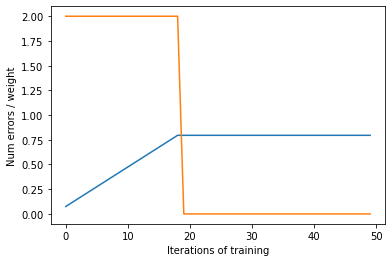

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))

Now we train the same neuron again to negate the inputs, by running `train()` with inversed expected outputs:

In [14]:
p1.train([1, 0, 1, 0, 0], [0, 1, 0, 1, 1])

In [11]:
p1.activate(0)

1

In [12]:
p1.activate(1)

0

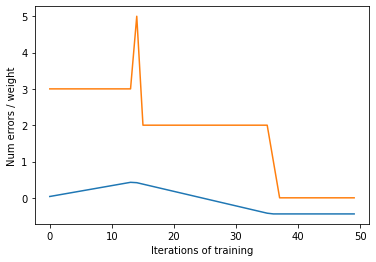

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylabel('Num errors / weight')
plt.xlabel('Iterations of training')
plt.plot(np.array(p1.w1_breadcrumbs))
plt.plot(np.array(p1.errors))